In [2]:
### import libraries and functions ###
library(dplyr)
library(tidyr)
library(ggplot2)
library(lubridate)
library(chisq.posthoc.test)

source('general_functions.R')

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'lubridate' was built under R version 3.6.3"

Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Warning message:
"package 'chisq.posthoc.test' was built under R version 3.6.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 3.6.3"

Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode




In [21]:
### load questionnaire data ###
# onboarding questionnaires
data_onboarding_groupassignment <- readRDS("data/questionnaires/data_onboarding_groupassignment.rds")
data_onboarding_baseline <- readRDS("data/questionnaires/data_onboarding_baseline.rds")
data_onboarding_transparency <- readRDS("data/questionnaires/data_onboarding_transparency.rds")
data_onboarding_control <- readRDS("data/questionnaires/data_onboarding_control.rds")
data_onboarding_both <- readRDS("data/questionnaires/data_onboarding_both.rds")

# pre and post questionnaires
data_startq <- readRDS("data/questionnaires/data_preq.rds")
data_postq <- readRDS("data/questionnaires/data_postq.rds")

In [3]:
### load app data ###
users <- readRDS("data/app/users.rds")

In [23]:
### Participation Rates. Amount of participants that ... ###

# For each stage, the participation rates depending on the four conditions are calculated

## ... showed interest in the study
n_assigned_ba <- nrow(data_onboarding_groupassignment %>% filter(RD01 == 1))
n_assigned_tr <- nrow(data_onboarding_groupassignment %>% filter(RD01 == 2))
n_assigned_co <- nrow(data_onboarding_groupassignment %>% filter(RD01 == 3))
n_assigned_bo <- nrow(data_onboarding_groupassignment %>% filter(RD01 == 4))

# ... completed the onboarding questionnaire
n_onboarding_finished_ba <- nrow(data_onboarding_baseline %>% filter(FINISHED == 1))
n_onboarding_finished_tr <- nrow(data_onboarding_transparency %>% filter(FINISHED == 1))
n_onboarding_finished_co <- nrow(data_onboarding_control %>% filter(FINISHED == 1))
n_onboarding_finished_bo <- nrow(data_onboarding_both %>% filter(FINISHED == 1))

# ... installed the app
n_appinst_ba = nrow(users %>% filter(condition=="baseline"))
n_appinst_tr = nrow(users %>% filter(condition=="transparency"))
n_appinst_co = nrow(users %>% filter(condition=="control"))
n_appinst_bo = nrow(users %>% filter(condition=="both"))

# ... completed the pre questionnaire
n_started_ba <- nrow(data_startq %>% filter(condition == "baseline"))
n_started_tr <- nrow(data_startq %>% filter(condition == "transparency"))
n_started_co <- nrow(data_startq %>% filter(condition == "control"))
n_started_bo <- nrow(data_startq %>% filter(condition == "both"))

# ...  kept app installed for at least one day
n_day1_ba = nrow(users %>% filter(condition=="baseline" & days_in_study >= ddays(1)))
n_day1_tr = nrow(users %>% filter(condition=="transparency" & days_in_study >= ddays(1)))
n_day1_co = nrow(users %>% filter(condition=="control" & days_in_study >= ddays(1)))
n_day1_bo = nrow(users %>% filter(condition=="both" & days_in_study >= ddays(1)))

# ... Kept app until study end
n_day6_ba = nrow(users %>% filter(condition=="baseline" & days_in_study >= ddays(6)))
n_day6_tr = nrow(users %>% filter(condition=="transparency" & days_in_study >= ddays(6)))
n_day6_co = nrow(users %>% filter(condition=="control" & days_in_study >= ddays(6)))
n_day6_bo = nrow(users %>% filter(condition=="both" & days_in_study >= ddays(6)))

# ... completed the post questionnaire
n_finished_ba <- nrow(data_postq %>% filter(condition == "baseline")) 
n_finished_tr <- nrow(data_postq %>% filter(condition == "transparency"))
n_finished_co <- nrow(data_postq %>% filter(condition == "control"))
n_finished_bo <- nrow(data_postq %>% filter(condition == "both"))

In [24]:
# Table 3
df_table3 <- data.frame(
  baseline_n = c(n_assigned_ba,n_onboarding_finished_ba,n_appinst_ba,n_day1_ba,n_day6_ba),
  baseline_perc = c(1,n_onboarding_finished_ba/n_assigned_ba,n_appinst_ba/n_onboarding_finished_ba,n_day1_ba/n_appinst_ba,n_day6_ba/n_day1_ba),
  transparency_n = c(n_assigned_tr,n_onboarding_finished_tr,n_appinst_tr,n_day1_tr,n_day6_tr),
  transparency_perc = c(1,n_onboarding_finished_tr/n_assigned_tr,n_appinst_tr/n_onboarding_finished_tr,n_day1_tr/n_appinst_tr,n_day6_tr/n_day1_tr),
  control_n = c(n_assigned_co,n_onboarding_finished_co,n_appinst_co,n_day1_co,n_day6_co),
  control_perc = c(1,n_onboarding_finished_co/n_assigned_co,n_appinst_co/n_onboarding_finished_co,n_day1_co/n_appinst_co,n_day6_co/n_day1_co),
  both_n = c(n_assigned_bo,n_onboarding_finished_bo,n_appinst_bo,n_day1_bo,n_day6_bo),
  both_perc = c(1,n_onboarding_finished_bo/n_assigned_bo,n_appinst_bo/n_onboarding_finished_bo,n_day1_bo/n_appinst_bo,n_day6_bo/n_day1_bo),
  total_n = c(n_assigned_ba+n_assigned_tr+n_assigned_co+n_assigned_bo,
              n_onboarding_finished_ba+n_onboarding_finished_tr+n_onboarding_finished_co+n_onboarding_finished_bo,
              n_appinst_ba+n_appinst_tr+n_appinst_co+n_appinst_bo,
              n_day1_ba+n_day1_tr+n_day1_co+n_day1_bo,
              n_day6_ba+n_day6_tr+n_day6_co+n_day6_bo),
  total_perc = c(1,
                 (n_onboarding_finished_ba+n_onboarding_finished_tr+n_onboarding_finished_co+n_onboarding_finished_bo)/(n_assigned_ba+n_assigned_tr+n_assigned_co+n_assigned_bo),
                 (n_appinst_ba+n_appinst_co+n_appinst_bo+n_appinst_tr)/(n_onboarding_finished_ba+n_onboarding_finished_tr+n_onboarding_finished_co+n_onboarding_finished_bo),
                 (n_day1_ba+n_day1_bo+n_day1_co+n_day1_tr)/(n_appinst_ba+n_appinst_co+n_appinst_bo+n_appinst_tr),
                 (n_day6_ba+n_day6_bo+n_day6_co+n_day6_tr)/(n_day1_ba+n_day1_bo+n_day1_co+n_day1_tr)
                 )
  )

View(df_table3)

baseline_n,baseline_perc,transparency_n,transparency_perc,control_n,control_perc,both_n,both_perc,total_n,total_perc
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
322,1.0000000,321,1.0000000,322,1.0000000,321,1.0000000,1286,1.0000000
56,0.1739130,57,0.1775701,51,0.1583851,63,0.1962617,227,0.1765163
38,0.6785714,27,0.4736842,43,0.8431373,42,0.6666667,150,0.6607930
29,0.7631579,23,0.8518519,38,0.8837209,38,0.9047619,128,0.8533333
29,1.0000000,23,1.0000000,37,0.9736842,37,0.9736842,126,0.9843750


In [10]:
### Tests: Differences in participation and dropout between the four study conditions ###
## (section 6.1 paragraph 2)

## Interst in Study -> Indicated Participation
mat_onboarding <- matrix(c(n_onboarding_finished_ba, 
                           n_onboarding_finished_tr,
                           n_onboarding_finished_co,
                           n_onboarding_finished_bo,
                        max(0,n_assigned_ba-n_onboarding_finished_ba), 
                        max(0,n_assigned_tr-n_onboarding_finished_tr),
                        max(0,n_assigned_co-n_onboarding_finished_co),
                        max(0,n_assigned_bo-n_onboarding_finished_bo)
                ), ncol=2)
colnames(mat_onboarding) <- c("Onboarded","Aborted")
row.names(mat_onboarding) <- c("baseline","transparency","control","both")
test_onboarding <- chisq.test(as.table(mat_onboarding), correct = FALSE)
print("Significance Test for differences in participation: Interst in Study -> Indicated Participation")
print(test_onboarding)

[1] "Significance Test for differences in participation: Interst in Study -> Indicated Participation"

	Pearson's Chi-squared test

data:  as.table(mat_onboarding)
X-squared = 1.6067, df = 3, p-value = 0.6579



In [11]:
## Indicated Participation -> App Installed
mat_onbq_appinst <- matrix(c(n_appinst_ba, 
                        n_appinst_tr,
                        n_appinst_co,
                        n_appinst_bo,
                        max(0,n_onboarding_finished_ba-n_appinst_ba), 
                        max(0,n_onboarding_finished_tr-n_appinst_tr),
                        max(0,n_onboarding_finished_co-n_appinst_co),
                        max(0,n_onboarding_finished_bo-n_appinst_bo)
), ncol=2)
colnames(mat_onbq_appinst) <- c("App Installed","App Not Installed")
row.names(mat_onbq_appinst) <- c("baseline","transparency","control","both")

print("Significance Test for differences in participation: Indicated Participation -> App Installed")
chi_sq_test("Indicated Participation -> App Installed", mat_onbq_appinst)

[1] "Significance Test for differences in participation: Indicated Participation -> App Installed"

	Pearson's Chi-squared test

data:  as.table(mat)
X-squared = 16.557, df = 3, p-value = 0.0008716

[1] "Onboarding Q finished -> App Inst : Significant relation found with p= 0.000871641628754211"
[1] "Onboarding Q finished -> App Inst : Variables in the following table whose magnitude is higher than -2.73436878653318 occured significantly more/less often"
     Dimension     Value App Installed App Not Installed
1     baseline Residuals     0.3237713        -0.3237713
2     baseline  p values     1.0000000         1.0000000
3 transparency Residuals    -3.4479014         3.4479014
4 transparency  p values     0.0045200         0.0045200
5      control Residuals     3.1236959        -3.1236959
6      control  p values     0.0142880         0.0142880
7         both Residuals     0.1158535        -0.1158535
8         both  p values     1.0000000         1.0000000


In [12]:
## App Installed -> Kept app installed for at least one day
mat_inst_day1 <- matrix(c(n_day1_ba, 
                          n_day1_tr,
                          n_day1_co,
                          n_day1_bo,
                          max(0,n_appinst_ba-n_day1_ba), 
                          max(0,n_appinst_tr-n_day1_tr),
                          max(0,n_appinst_co-n_day1_co),
                          max(0,n_appinst_bo-n_day1_bo)
), ncol=2)
colnames(mat_inst_day1) <- c("App 1+ day","App less than 1 day")
row.names(mat_inst_day1) <- c("baseline","transparency","control","both")
test_inst_day1 <- chisq.test(as.table(mat_inst_day1), correct = FALSE)
print("Significance Test for differences in participation: App Installed -> Kept app installed for at least one day")
print(test_inst_day1)


Warning message in chisq.test(as.table(mat_inst_day1), correct = FALSE):
"Chi-squared approximation may be incorrect"


[1] "Significance Test for differences in participation: App Installed -> Kept app installed for at least one day"

	Pearson's Chi-squared test

data:  as.table(mat_inst_day1)
X-squared = 3.6742, df = 3, p-value = 0.2989



In [13]:
## Kept app installed for at least one day -> Kept app until study end
n_day6_ba = nrow(users %>% filter(condition=="baseline" & days_in_study >= ddays(6)))
n_day6_tr = nrow(users %>% filter(condition=="transparency" & days_in_study >= ddays(6)))
n_day6_co = nrow(users %>% filter(condition=="control" & days_in_study >= ddays(6)))
n_day6_bo = nrow(users %>% filter(condition=="both" & days_in_study >= ddays(6)))
mat_day1_day6 <- matrix(c(n_day6_ba, 
                          n_day6_tr,
                          n_day6_co,
                          n_day6_bo,
                          max(0,n_day1_ba-n_day6_ba), 
                          max(0,n_day1_tr-n_day6_tr),
                          max(0,n_day1_co-n_day6_co),
                          max(0,n_day1_bo-n_day6_bo)
), ncol=2)
colnames(mat_day1_day6) <- c("App 6+ day","App less than 6 day")
row.names(mat_day1_day6) <- c("baseline","transparency","control","both")
print("Significance Test for differences in participation: Kept app installed for at least one day -> Kept app until study end")
chi_sq_test("Kept app installed for at least one day -> Kept app until study end",mat_day1_day6)

[1] "Significance Test for differences in participation: Kept app installed for at least one day -> Kept app until study end"


Warning message in chisq.test(as.table(mat), correct = FALSE):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  as.table(mat)
X-squared = 1.3901, df = 3, p-value = 0.7078

[1] "Kept app installed for at least one day -> Kept app until study end : No significant relation found"


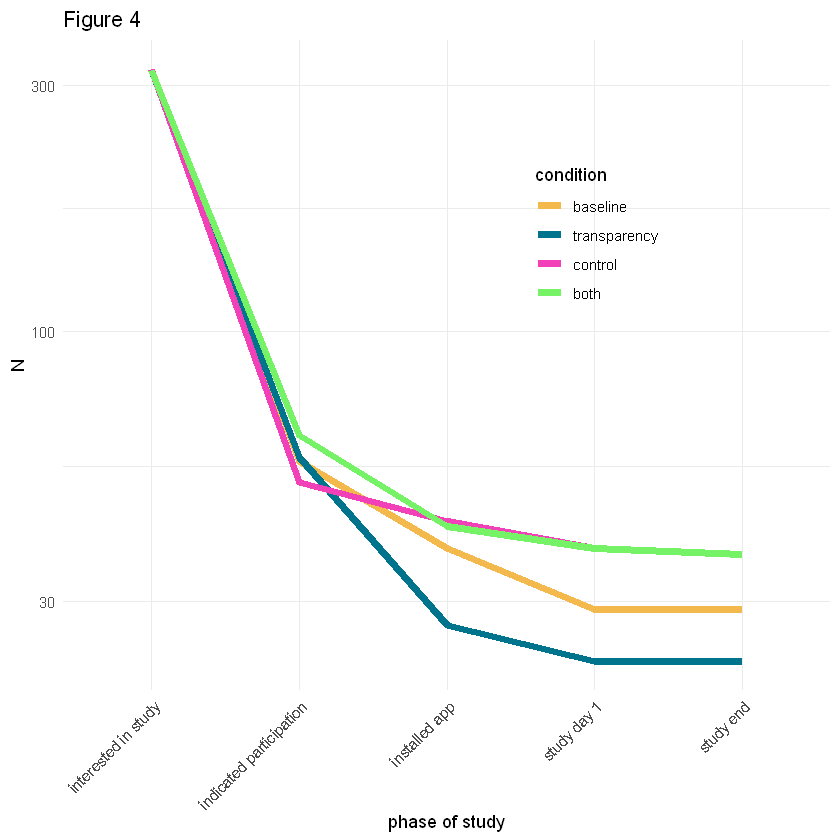

In [29]:
## Chart: Study Progress (Figure 4)
df_studyprogress <- data.frame(studyprogress = factor(c("interested in study",
                                    "interested in study",
                                    "interested in study",
                                    "interested in study",
                                    "indicated participation",
                                    "indicated participation",
                                    "indicated participation",
                                    "indicated participation",
                                    "installed app",
                                    "installed app",
                                    "installed app",
                                    "installed app",
                                    "study day 1",
                                    "study day 1",
                                    "study day 1",
                                    "study day 1",                                 
                                    "study end",
                                    "study end",
                                    "study end",
                                    "study end"
                                    ), levels=c("interested in study","indicated participation","installed app","study day 1","study end")), # this defines the order on the x axis
                 condition = factor(c("baseline", 
                               "transparency",
                               "control",
                               "both",
                               "baseline", 
                               "transparency",
                               "control",
                               "both",
                               "baseline", 
                               "transparency",
                               "control",
                               "both",
                               "baseline", 
                               "transparency",
                               "control",
                               "both",
                               "baseline", 
                               "transparency",
                               "control",
                               "both"),levels=c("baseline","transparency","control","both")),
                 N = c(n_assigned_ba,
                       n_assigned_tr,
                       n_assigned_co,
                       n_assigned_bo,
                       n_onboarding_finished_ba,
                       n_onboarding_finished_tr,
                       n_onboarding_finished_co,
                       n_onboarding_finished_bo,
                       n_appinst_ba,
                       n_appinst_tr,
                       n_appinst_co,
                       n_appinst_bo,
                       n_day1_ba,
                       n_day1_tr,
                       n_day1_co,
                       n_day1_bo,                
                       n_day6_ba,
                       n_day6_tr,
                       n_day6_co,
                       n_day6_bo
                       )
)

ggplot(
  data=data.frame(df_studyprogress), 
  aes(x = studyprogress, y = N, color = condition, group=condition)
  ) + 
  geom_line(size = 2)+
  scale_color_manual(values=c('#f3b94d','#00748d','#F241B8','#76F266'))+
  theme_minimal()+
  labs(x="phase of study",y="N", title="Figure 4")+
  scale_y_continuous(trans='log10') +
  theme(
    axis.text.x = element_text(angle = 45, hjust=1),
    legend.position = c(.7, .7)
    )

`summarise()` ungrouping output (override with `.groups` argument)

Joining, by = "username"

Warning message:
"package 'plyr' was built under R version 3.6.3"
------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: 'plyr'


The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Warning message:
"Removed 4 rows containing missing values (geom_bar)."


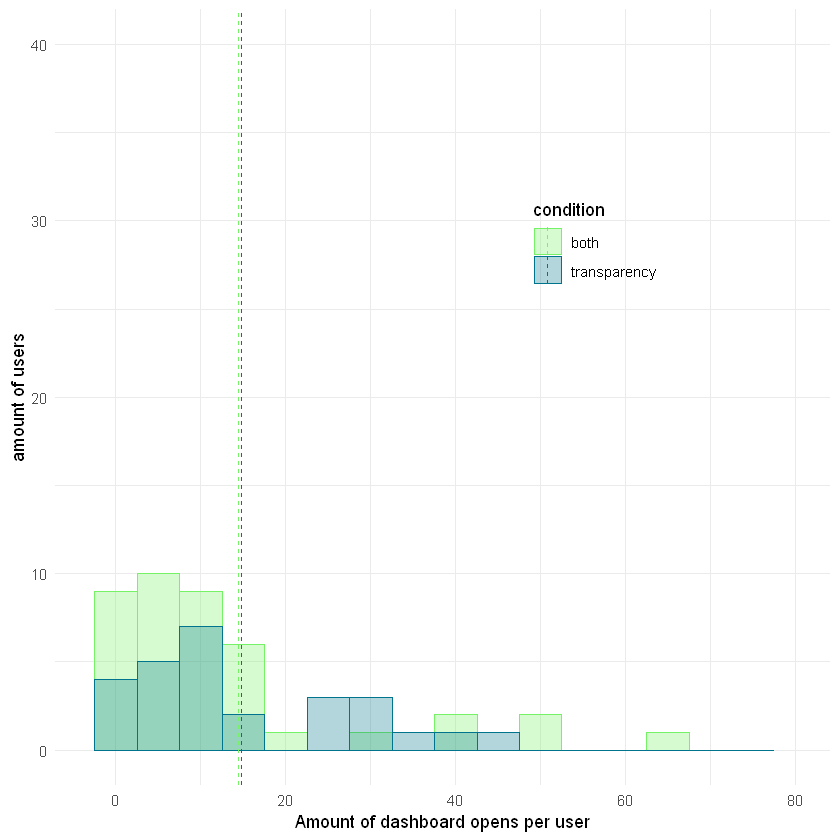

In [4]:
### Usage of the Privacy Dashboard
## import
ps_dashboard_usage <- readRDS('data/app/ps_dashboard_usage.rds')

## How is the usage distributed across the participants?
ps_dashboard_usage_counts <- ps_dashboard_usage %>% 
  filter(dashboard_event == "DASHBOARD_OPENED") %>%
  filter(condition %in% c("transparency","both")) %>%
  group_by(username) %>%
  dplyr::summarize(count=n()) %>%
  dplyr::right_join(users %>% select(username,condition) %>% filter(condition %in% c("transparency","both"))) %>%
  mutate(count = ifelse(is.na(count), 0, count)) %>%
   mutate(transparency = condition %in% c("transparency","both"), control = condition %in% c("control","both"))

library(plyr)
mu <- ps_dashboard_usage_counts %>% ddply("condition", summarise, grp.mean=mean(count))
 
## Figure 5a
ggplot(data = ps_dashboard_usage_counts, aes(x = count, fill=condition, color=condition)) +
  geom_histogram(binwidth = 5, alpha=0.3, position="identity") +
  theme_minimal() + 
  labs(y = "amount of users", x = "Amount of dashboard opens per user")+
  scale_fill_manual(values=c('#76F266','#00748d'))+
  scale_color_manual(values=c('#76F266','#00748d'))+
  # add mean line
  geom_vline(data=mu, aes(xintercept=grp.mean, color=condition),
             linetype="dashed")+
    xlim(-3,80)+
  ylim(0,40)+
    theme(
    legend.position = c(.7, .7)
    )

`summarise()` ungrouping output (override with `.groups` argument)

Joining, by = "username"

Warning message:
"Removed 4 rows containing missing values (geom_bar)."


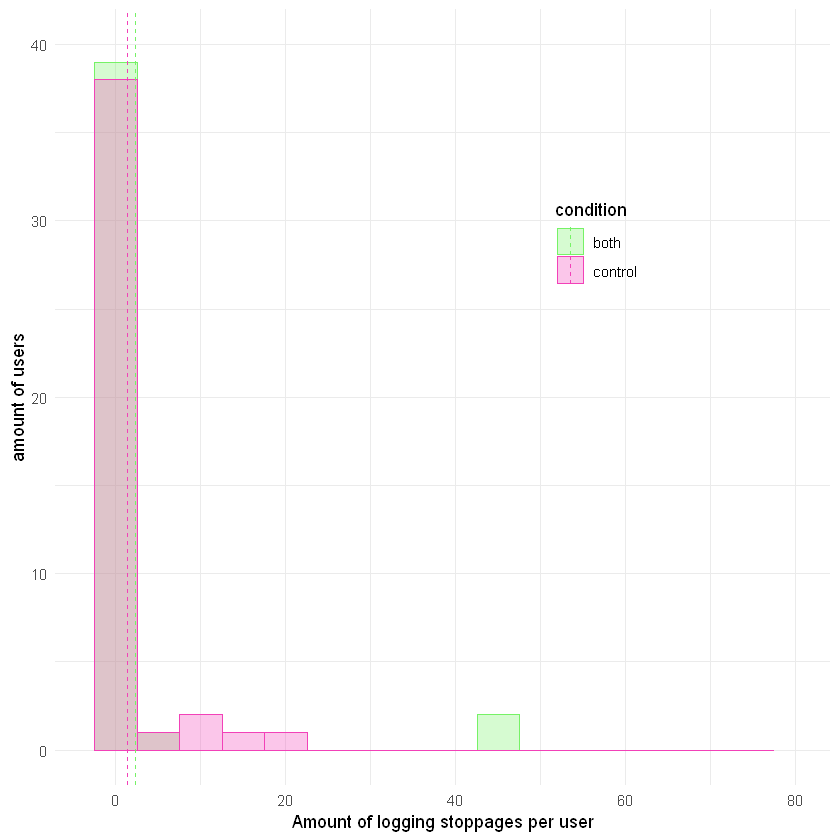

In [7]:
### Usage of Control features
psusage <- readRDS("data/app/ps_usage.rds") # TODO file

ps_control_usage_counts <- psusage %>% 
  filter(event == "logging-feature-status-changed") %>%
  filter(condition %in% c("control","both")) %>%
  group_by(username) %>%
  dplyr::summarize(count=n()) %>%
  dplyr::right_join(users %>% select(username,condition) %>% filter(condition %in% c("control","both"))) %>%
  mutate(count = ifelse(is.na(count), 0, count))
  
library(plyr)
mu2 <- ps_control_usage_counts %>% ddply("condition", summarise, grp.mean=mean(count))
 
# Figure 5b
ggplot(data = ps_control_usage_counts, aes(x = count, fill=condition, color=condition)) +
  geom_histogram(binwidth = 5, alpha=0.3, position="identity") +
  theme_minimal() + 
  labs(y = "amount of users", x = "Amount of logging stoppages per user")+
  scale_fill_manual(values=c('#76F266','#F241B8'))+
  scale_color_manual(values=c('#76F266','#F241B8'))+
  # add mean line
  geom_vline(data=mu2, aes(xintercept=grp.mean, color=condition),
             linetype="dashed")+
  xlim(-3,80)+
  ylim(0,40)+
    theme(
    legend.position = c(.7, .7)
    )

In [16]:
### Tests: Differences in the usage of Transparency features between the four study conditions ###
## (section 6.1 paragraph 3)
# independent samples t test
independent_samples_t_test(
    ps_dashboard_usage_counts %>% 
    filter(condition == "transparency") %>% 
    .$count, ps_dashboard_usage_counts %>% 
    filter(condition == "both") %>% 
    .$count, ps_dashboard_usage_counts
)


Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


[1] "is normally distributed:  FALSE , has equal variances:  TRUE"
[1] "continuing with Mann-Whitney U Test"


Warning message in wilcox.test.default(df1, df2):
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  df1 and df2
W = 631.5, p-value = 0.4301
alternative hypothesis: true location shift is not equal to 0



In [17]:
### Tests: Differences in the usage of Control features between the four study conditions ###
## (section 6.1 paragraph 4)
# independent samples t test
independent_samples_t_test(
    ps_control_usage_counts %>% 
    filter(condition == "control") %>% 
    .$count, ps_control_usage_counts %>% 
    filter(condition == "both") %>% 
    .$count, ps_control_usage_counts
)

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


[1] "is normally distributed:  FALSE , has equal variances:  TRUE"
[1] "continuing with Mann-Whitney U Test"


Warning message in wilcox.test.default(df1, df2):
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  df1 and df2
W = 960, p-value = 0.3945
alternative hypothesis: true location shift is not equal to 0

